# Descripción de la data

**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]


# Carga de bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split , KFold, cross_val_score

# Carga de la data

In [ ]:
df_heart = pd.read_csv('heart.csv')
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Análisis preliminar data

In [ ]:
df_heart.describe(include=np.object)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [ ]:
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


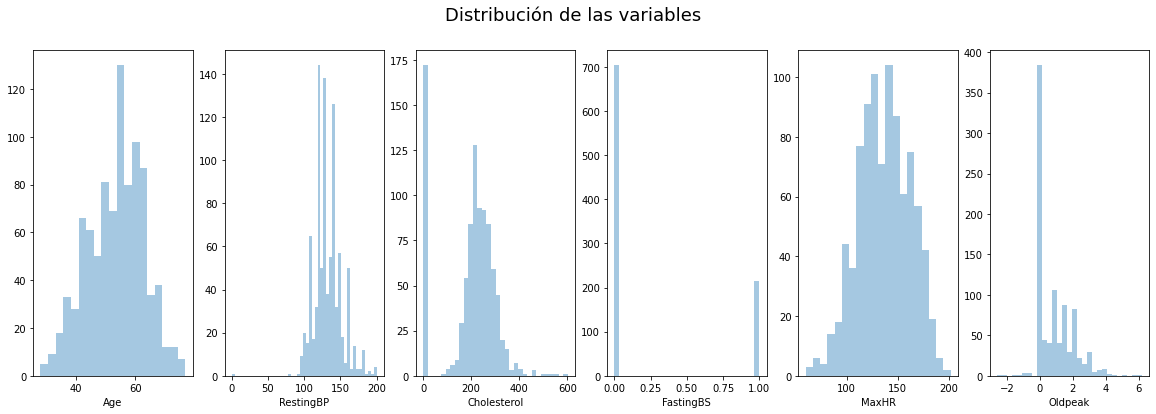

In [ ]:
import seaborn as sns
columnas = np.array(df_heart.drop(['HeartDisease', 'Sex','ChestPainType','RestingECG',
                                   'ExerciseAngina', 'ST_Slope'], axis=1).columns)
fig, ax = plt.subplots(1, columnas.size, figsize=(20, 6))
fig.suptitle("Distribución de las variables", fontsize=18)
index = 0
for col in columnas:
  sns.distplot(df_heart[col], ax=ax[index], kde=False) 
  index += 1
plt.show()

# Transformación de la data

### Columnas cualitativas usando LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_frame = df_heart.copy()
columns_dropped = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data_frame.drop(columns_dropped, axis=1)
data_frame.Sex = encoder.fit_transform(df_heart.Sex)
data_frame.ChestPainType = encoder.fit_transform(df_heart.ChestPainType)
data_frame.RestingECG = encoder.fit_transform(df_heart.RestingECG)
data_frame.ExerciseAngina = encoder.fit_transform(df_heart.ExerciseAngina)
data_frame.ST_Slope = encoder.fit_transform(df_heart.ST_Slope)
data_frame.sample(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
469,56,1,1,124,224,1,1,161,0,2.0,1,0
231,40,1,2,130,281,0,1,167,0,0.0,2,0
183,46,1,0,110,238,0,2,140,1,1.0,1,0
285,51,0,2,110,190,0,1,120,0,0.0,2,0
628,61,1,3,134,234,0,1,145,0,2.6,1,1
407,62,1,0,115,0,1,1,72,1,-0.5,1,1
862,65,0,2,155,269,0,1,148,0,0.8,2,0


In [ ]:
data_frame.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


# Análisis formal de la data

## Correlación

In [ ]:
data_frame.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


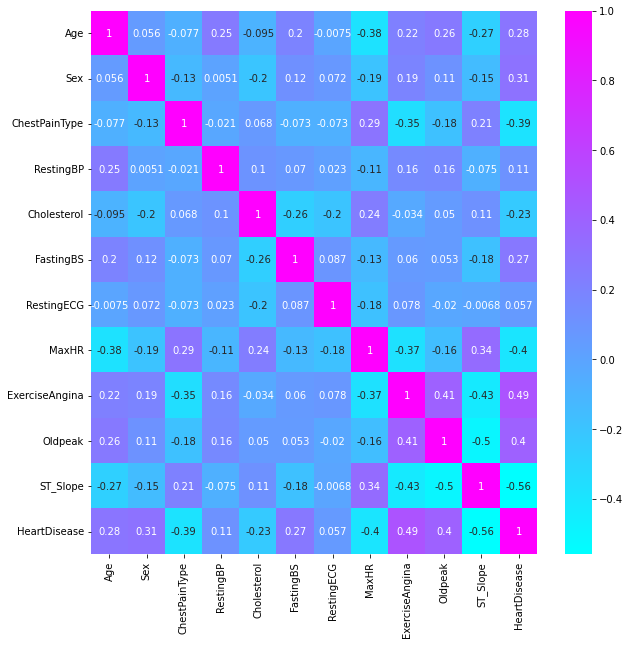

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data_frame.corr(), annot=True, cmap='cool')

## Revisa distribución de la variable a predecir

In [ ]:
df_heart.groupby('HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

# Aplicación de regresión 

## SIN estandarizar

In [ ]:
def metricasRegresion(modelo, X_train, X_test, y_train, y_test):
  y_train_pred = modelo.predict(X_train)
  y_test_pred = modelo.predict(X_test)
  return mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test), r2_score(y_train,y_train_pred, y_train), r2_score(y_test,y_test_pred, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 

In [ ]:
prediction_features = ['Age','Sex', 'FastingBS', 'ExerciseAngina','Oldpeak']
X = data_frame[prediction_features]
y = data_frame['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=29)

In [ ]:
modelo = LogisticRegression(random_state=0)
modelo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
modelo.predict(X_test)

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
print("Score en entrenamiento : %f " % modelo.score(X_train, y_train))
print("Score en prueba : %f " % modelo.score(X_test, y_test))

Score en entrenamiento : 0.786104 
Score en prueba : 0.809783 


In [ ]:
name='Logistic Regression usando CV'
kfold = KFold(n_splits=10, random_state=29)
cv_results = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='accuracy')
print("%s: %f" % (name, cv_results.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Logistic Regression usando CV: 0.786172


### Métricas

In [ ]:
y_prob = modelo.predict_proba(X)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_prob[:,1])

0.8658536585365854



---
**Interpretación de la métrica**


---

La curva ROC (característica operativa del receptor) constituye una herramienta importante para evaluar el rendimiento de un modelo de machine learning.

Muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) del modelo

In [ ]:
print(classification_report(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        94
           1       0.79      0.83      0.81        90

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [ ]:
confusion_matrix(y_test, modelo.predict(X_test))

array([[74, 20],
       [15, 75]])

## CON estandarización

Ahora se revisará considerando la estandarización de algunas características

### Usando escalado estándar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
prediction_features = ['Age','Sex', 'FastingBS', 'ExerciseAngina','Oldpeak']
X = data_frame[prediction_features]
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
y = data_frame['HeartDisease']
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=29)

In [ ]:
modelo_e = LogisticRegression()
modelo_e.fit(X_train_e, y_train_e)
y_pred = modelo_e.predict(X_test_e)

print(classification_report(y_test_e, y_pred))

print(confusion_matrix(y_test_e, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        94
           1       0.80      0.83      0.82        90

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

[[75 19]
 [15 75]]


### Usando MinMax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerN = MinMaxScaler()
scalerN.fit(X)
X_scaled_a = scalerN.transform(X)

In [ ]:
y = data_frame['HeartDisease']
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_scaled_a, y, 
                                                    test_size=0.2, random_state=29)

In [ ]:
modelo_ex = LogisticRegression()
modelo_ex.fit(X_train_ex, y_train_ex)
y_pred_x = modelo_ex.predict(X_test_ex)

print(classification_report(y_test_ex, y_pred_x))

print(confusion_matrix(y_test_ex, y_pred_x))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        94
           1       0.79      0.80      0.80        90

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184

[[75 19]
 [18 72]]
